In [1]:
import numpy as np
import glob
import os

# for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import LogNorm
%matplotlib inline

from PIL import Image 
# Nedded for background fit
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize

# needed for spotfinder
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters

# custom functions
from DefDefDefinitions import PE_Vals
from DefDefDefinitions import Image_Converter
from DefDefDefinitions import FrequencyFilterFunction
from DefDefDefinitions import FFT_Filter
from DefDefDefinitions import Unique_Circle
from DefDefDefinitions import Fit_2D_Gaussian
from DefDefDefinitions import gaussian_2d
from DefDefDefinitions import Spot_finder
from DefDefDefinitions import Spot_Area
from DefDefDefinitions import Step_fit
from DefDefDefinitions import Line_fit
from DefDefDefinitions import moving_average
from DefDefDefinitions import Trajectory

In [2]:
CWD = os.getcwd()
CWD = CWD+'/data/'
DIR = 'Exp/Copoly w Ba/+0/1'
Dir = CWD+DIR

In [4]:
end = 200
DataFiles = glob.glob(Dir+'/*')
DataFiles.sort()
DataFiles = DataFiles[0:end]

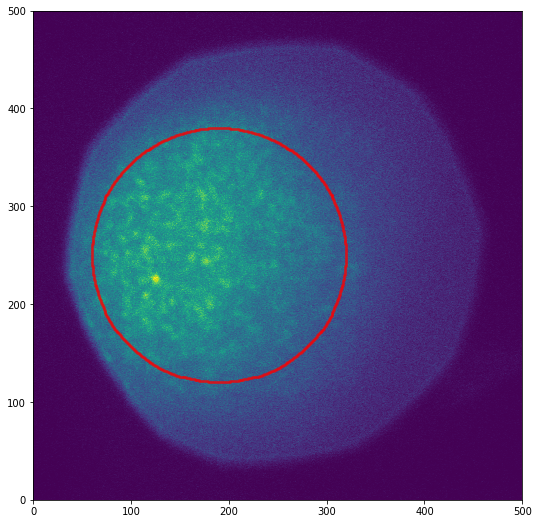

In [16]:
Row    = int(250)
Col    = Row
Yindex = int(256)
Xindex = int(256)

eOffset, eCoeff = PE_Vals(DataFiles[0])
Test = Image_Converter(DataFiles[0], eOffset, eCoeff, Xindex, Yindex, Row, Col)
Shape = Test.shape[0]

plt.figure(figsize=(9,9))

r = 130
Xoff = 190
Yoff = 250

X_circle, Y_circle = Unique_Circle(r, Xoff, Yoff)
keep = np.where(Y_circle<Shape)
Y_circle = Y_circle[keep]
X_circle = X_circle[keep]
keep = np.where(X_circle<Shape)
Y_circle = Y_circle[keep]
X_circle = X_circle[keep]

plt.scatter(X_circle,Y_circle,color='r',lw=2,alpha=0.4,s=1)

plt.imshow(Test)
plt.xlim(0,500)
plt.ylim(0,500)
plt.show()